In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

#import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
#from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Gradient descent and co
def d_da(x, y, a, b):
    result = np.zeros(len(x))
    for i in range(len(x)-1):
        result[i] = (- a * x[i] - b + y[i]) * x[i]
    return -2 * result.mean()
def d_db(x, y, a, b):
    result = np.zeros(len(x))
    for i in range(len(x)-1):
        result[i] = y[i] - a*x[i] - b
    return -2 * result.mean()
def grad_desc(x, y, aa, bb, lambda_a, lambda_b, n_iter, a_tr, b_tr):
    err = np.zeros(n_iter)
    for n in range(n_iter):
        aa = aa - lambda_a * d_da(x, y, aa, bb)
        bb = bb - lambda_b * d_db(x, y, aa, bb)
        err[n] = ((y-aa*x-bb)**2).mean()
    return aa, bb, err


In [3]:
#some params:
number_of_points = 600
n_iter = 500
a_true = 2 
b_true = 10
sigma_sq = 8 #degree of the Variance of Gaus's noize for our (ax+b) line
aa = 1 # start a for grad descent
bb = 1 # start b for grad descent
lambda_a = 0.0001 #coef of edu a
lambda_b = 0.01 #coef of edu b

x = np.linspace(0, int(number_of_points/10), number_of_points)
#y(x) is a noized points near y=ax+b
y = np.linspace(0, number_of_points/10, number_of_points) * a_true + b_true + np.random.normal(0, sigma_sq, (number_of_points))
# plt.figure(figsize=(15,10))
# plt.plot(x, y, 'b^')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.grid()
# plt.show()

True a and b:  (2, 10)
Gradiend descent solution:  (1.9821201396439183, 10.23492283130717)
Numpy linalg least square solution:  (1.9618271822959594, 10.984617677098056)


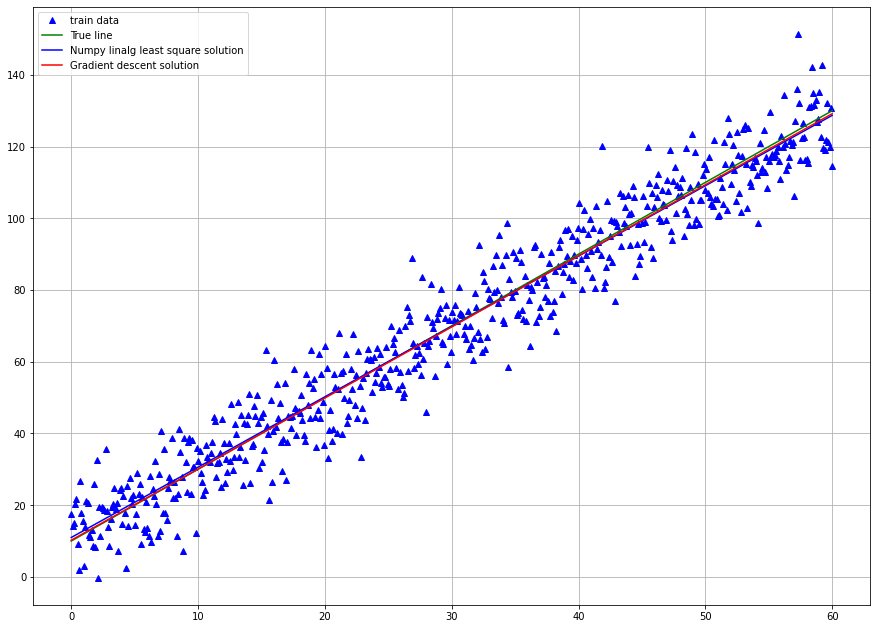

In [4]:
#our grad desc
a_new, b_new, errors = grad_desc(x, y, aa, bb, lambda_a, lambda_b, n_iter, a_true, b_true)
#solution from numpy
a_fit, b_fit = np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]
print("True a and b: ", (a_true, b_true))
print("Gradiend descent solution: ", (a_new, b_new))
print("Numpy linalg least square solution: ", (a_fit, b_fit))
plt.figure(figsize=(15,11))
plt.plot(x, y, 'b^', label = "train data")
plt.plot(x, a_true*x + b_true, 'g', label='True line')
plt.plot(x, a_fit*x + b_fit, 'b', label='Numpy linalg least square solution')
plt.plot(x, a_new*x + b_new, 'r', label='Gradient descent solution')
plt.grid()
plt.legend()
plt.show()

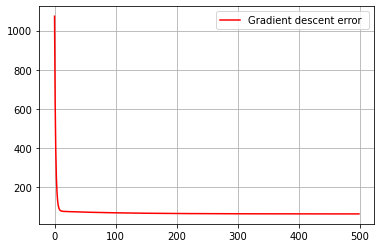

In [5]:
plt.plot(range(n_iter), errors, 'r', label='Gradient descent error ')
plt.grid()
plt.legend()
plt.show()

In [6]:
#sigmoid func
def sigm(z):
    return 1/(1+np.exp(-z))
#p^ from prezentation
def p(x, y, a, b):
    f = sigm(x.dot(a) + b)
    da = np.dot(x.T, (f - y))/x.shape[0]
    db = (f - y).mean()
    error = -(y * np.log(f) + (1-y) * np.log(1-f)).mean()
    return da, db, error
#grad descent func for 2d
def grad_2(x, y, n_iter, a0=1, b0=1, lmbd_a = 0.0001, lmbd_b = 0.01):
    a = a0
    b = b0
    errors = np.zeros(n_iter)
    for i in range(n_iter):
        da, db, errors[i] = p(x, y, a, b)
        a = a - lmbd_a * da
        b = b - lmbd_b * db
        
    return a, b, errors
#prediction func
def pred(x, a, b):
    pred = np.zeros(x.shape[0])
    f = sigm(x.dot(a) + b)
    for i in range(x.shape[0]):
        if(f[i] >= 0.5):
            pred[i] = 1
    return pred

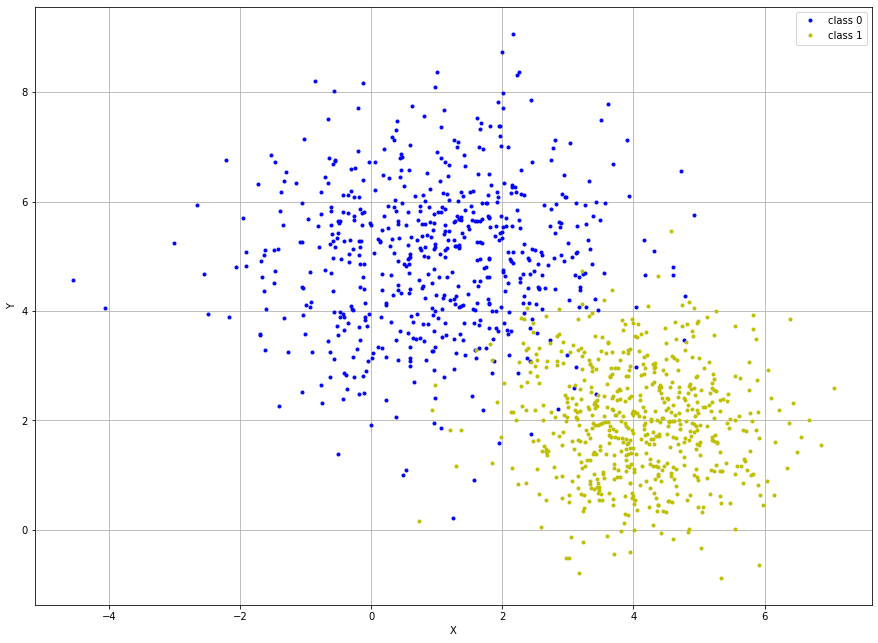

In [7]:
x_1 = np.random.multivariate_normal([1,5], [[2, 0], [0, 2]], (number_of_points))#, np.zeros(number_of_points, int)])
x_2 = np.random.multivariate_normal([4,2], [[1, 0], [0, 1]], (number_of_points))#, np.ones(number_of_points, int)])
y_1 = np.zeros(number_of_points, int)
y_2 = np.ones(number_of_points, int)
plt.figure(figsize=(15,11))
plt.plot(x_1[...,0], x_1[...,1], 'b.', label = "class 0")
plt.plot(x_2[...,0], x_2[...,1], 'y.', label = "class 1")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

accuracy:  0.9625


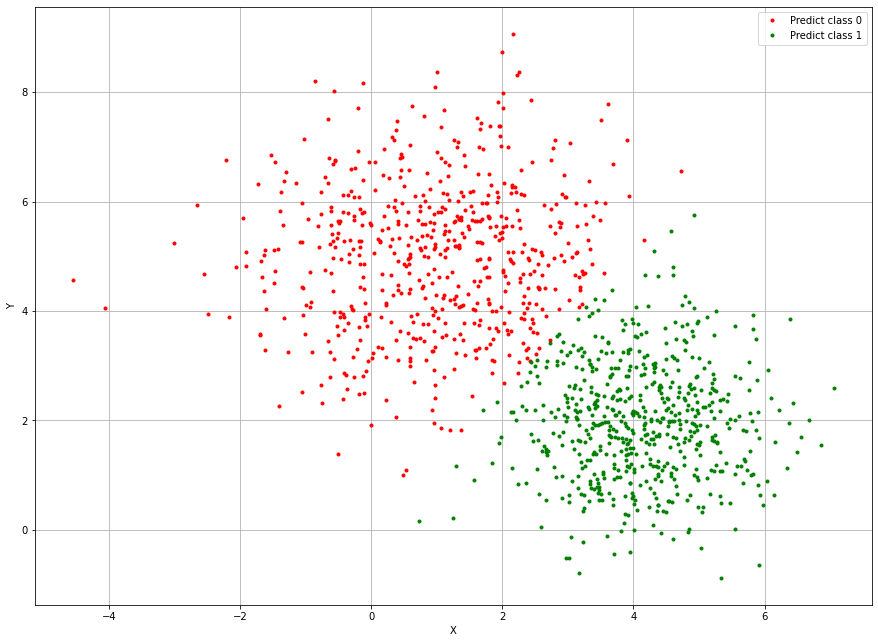

In [8]:
n_iter2 = 3000
start_a = np.array([0,0])
start_b = 0
lmbd_a = 0.01
lmbd_b = 0.01
x = np.concatenate([x_1,x_2])
y = np.hstack([y_1,y_2])

a, b, errors = grad_2(x, y, n_iter2, start_a, start_b, lmbd_a, lmbd_b)
hit = pred(x,a,b)
print("accuracy: ", 1 - abs(y-hit).mean())

x_for_plot = np.linspace(x.min(), x.max(), x.shape[0])
plt.figure(figsize=(15,11))
plt.plot(x[...,0][hit==0], x[...,1][hit==0], 'r.', label = "Predict class 0")
plt.plot(x[...,0][hit==1], x[...,1][hit==1], 'g.', label = "Predict class 1")
#plt.plot(x_for_plot, x_for_plot * a[0] + b, 'r', label = "line")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

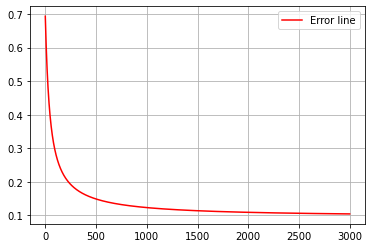

In [9]:
plt.plot(range(n_iter2), errors, 'r', label='Error line')
plt.grid()
plt.legend()
plt.show()